Import libraries

In [1]:
import matplotlib.pyplot as plt 
import numpy as np
import sklearn
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn import datasets
from sklearn.model_selection import train_test_split

Load data and test print

In [2]:
data = datasets.load_digits()

0


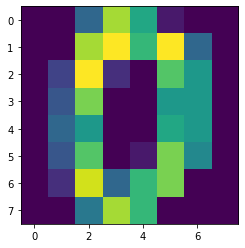

In [3]:
test = data.data[0].reshape(8,8)
print(data.target[0])
plt.imshow(test)

Split data into X_train, X_test, y_train and y_test

In [4]:
n = len(data.data)
print(n)

1797


In [5]:
X = np.asarray([data.data[i] for i in range(n)])
y = np.asarray([data.target[i] for i in range(n)])
print(X.shape, y.shape)

(1797, 64) (1797,)


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

Process the data with a k-NN classifier

In [7]:
kNN = KNeighborsClassifier(n_neighbors = 5, algorithm = 'brute')

In [8]:
kNN.fit(X_train, y_train)

KNeighborsClassifier(algorithm='brute')

In [22]:
y_pred = kNN.predict(X_test)

In [23]:
distances, neighbors = kNN.kneighbors(X_test)
print(distances.shape, neighbors.shape)

(540, 5) (540, 5)


In [11]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.95      1.00      0.97        53
           2       1.00      1.00      1.00        57
           3       0.97      0.97      0.97        62
           4       1.00      1.00      1.00        51
           5       0.98      0.98      0.98        54
           6       1.00      0.98      0.99        45
           7       0.97      1.00      0.98        63
           8       1.00      0.96      0.98        52
           9       0.98      0.94      0.96        53

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540



In [12]:
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[50  0  0  0  0  0  0  0  0  0]
 [ 0 53  0  0  0  0  0  0  0  0]
 [ 0  0 57  0  0  0  0  0  0  0]
 [ 0  0  0 60  0  0  0  2  0  0]
 [ 0  0  0  0 51  0  0  0  0  0]
 [ 0  0  0  0  0 53  0  0  0  1]
 [ 0  1  0  0  0  0 44  0  0  0]
 [ 0  0  0  0  0  0  0 63  0  0]
 [ 0  1  0  1  0  0  0  0 50  0]
 [ 0  1  0  1  0  1  0  0  0 50]]


Cluster the data with k-Means

In [13]:
kmeans = KMeans(n_clusters=10)

In [14]:
clusters = kmeans.fit(X_train)

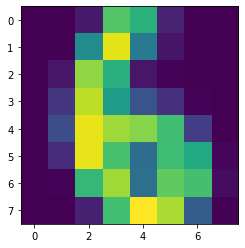

In [15]:
plt.imshow(kmeans.cluster_centers_[0].reshape(8,8))

In [16]:
y_pred = kmeans.predict(X_test)

In [17]:
print(sklearn.metrics.classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        50
           1       0.11      0.11      0.11        53
           2       0.00      0.00      0.00        57
           3       0.03      0.03      0.03        62
           4       0.00      0.00      0.00        51
           5       0.00      0.00      0.00        54
           6       0.00      0.00      0.00        45
           7       0.00      0.00      0.00        63
           8       0.02      0.02      0.02        52
           9       0.29      0.13      0.18        53

    accuracy                           0.03       540
   macro avg       0.04      0.03      0.03       540
weighted avg       0.04      0.03      0.03       540



In [18]:
print(sklearn.metrics.confusion_matrix(y_test, y_pred))

[[ 0  0  0  0  0  0 50  0  0  0]
 [ 2  6  0 31  0  0  0  0  1 13]
 [ 0 46  0  3  0  1  1  1  5  0]
 [ 0  0  0  2  0  2  0  4 54  0]
 [ 0  0 45  1  0  2  0  0  0  3]
 [ 0  0  1  0 42  0  0 11  0  0]
 [43  0  0  2  0  0  0  0  0  0]
 [ 0  0  0  1  2 60  0  0  0  0]
 [ 0  1  0 29  2  0  0 18  1  1]
 [ 0  0  0  0  1  3  0 41  1  7]]


In [21]:
y_pred = kmeans.predict(X_train)

print(sklearn.metrics.completeness_score(y_train, y_pred))
print(sklearn.metrics.homogeneity_score(y_train, y_pred))
print(sklearn.metrics.adjusted_mutual_info_score(y_train, y_pred))

0.7420494970425856
0.735568230624516
0.7349995643895861


Check List

Label: 9, predicted as:9


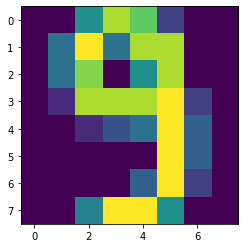

In [26]:
print('Label: '+str(y_test[0])+', predicted as: '+str(y_pred[0]))
plt.imshow(X_test[0].reshape(8,8))

In [50]:
neighbors[1,:]

array([941, 280, 658, 702, 996], dtype=int64)

In [31]:
X_test.shape

(540, 64)

In [45]:
max(neighbors[:,])

IndexError: index 5 is out of bounds for axis 1 with size 5